https://machinelearningmastery.com/image-augmentation-with-keras-preprocessing-layers-and-tf-image/

In [3]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import cv2
import shutil

creating new folders to resized images

In [2]:
# os.mkdir('resized_data_class_1')
# os.mkdir('resized_data_class_2')
# os.mkdir('resized_data_class_3')
# os.mkdir('resized_data_class_4')

In [2]:
# imputFolder = 'data'
# folderLen = len(imputFolder)

Resizing images and insert them to new folders

In [11]:
# imputFolder = 'data'
# folderLen = len(imputFolder)
# sub_path_lst = []
# for folder in os.listdir('data'):
#     sub_path='data'+'/'+folder
#     sub_path_lst.append(sub_path)

#     for img in os.listdir(sub_path):
#         if sub_path == sub_path_lst[0]:
#             image_path=sub_path_lst[0]+"/"+img
#             img_arr=cv2.imread(image_path)
#             img_arr=cv2.resize(img_arr,(224,224))
#             path = 'resized_data_class_1'
#             os.path.join(path , img[folderLen:])
#             cv2.imwrite(os.path.join(path , img[folderLen:]), img_arr)

#         elif sub_path == sub_path_lst[1]:
#             image_path=sub_path_lst[1]+"/"+img
#             img_arr=cv2.imread(image_path)
#             img_arr=cv2.resize(img_arr,(224,224))
#             path = 'resized_data_class_2'
#             os.path.join(path , img[folderLen:])
#             cv2.imwrite(os.path.join(path , img[folderLen:]), img_arr)

#         elif sub_path == sub_path_lst[2]:
#             image_path=sub_path_lst[2]+"/"+img
#             img_arr=cv2.imread(image_path)
#             img_arr=cv2.resize(img_arr,(224,224))
#             path = 'resized_data_class_3'
#             os.path.join(path , img[folderLen:])
#             cv2.imwrite(os.path.join(path , img[folderLen:]), img_arr)

#         elif sub_path == sub_path_lst[3]:
#             image_path=sub_path_lst[3]+"/"+img
#             img_arr=cv2.imread(image_path)
#             img_arr=cv2.resize(img_arr,(224,224))
#             path = 'resized_data_class_4'
#             os.path.join(path , img[folderLen:])
#             cv2.imwrite(os.path.join(path , img[folderLen:]), img_arr)

In [ ]:
# shutil.move('resized_data_class_1', 'resized_data')
# shutil.move('resized_data_class_2', 'resized_data')
# shutil.move('resized_data_class_3', 'resized_data')
# shutil.move('resized_data_class_4', 'resized_data')

LOding to the data pipeline

In [73]:
data = tf.keras.utils.image_dataset_from_directory('resized_data', image_size=(224, 224))

Found 6452 files belonging to 4 classes.


In [74]:
data_iterator = data.as_numpy_iterator()
data_iterator

In [75]:
batch = data_iterator.next()
batch
batch[0].shape

(32, 224, 224, 3)

In [5]:
for idx, img in enumerate(batch[0][:4]):
    print(len(img))

224
224
224
224


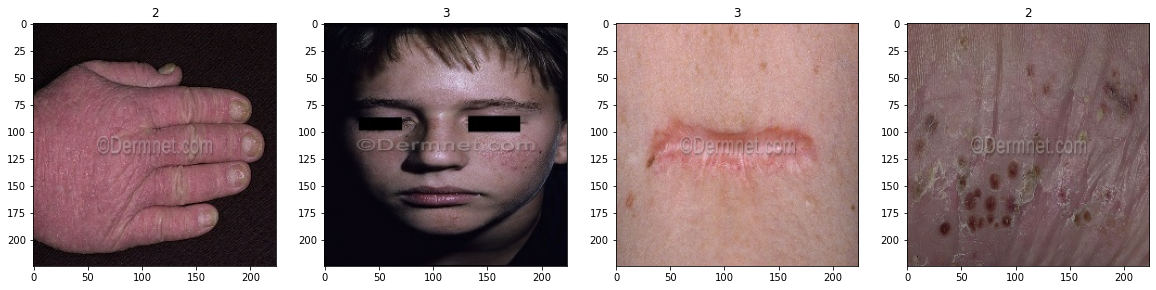

In [76]:
fig, ax = plt.subplots(ncols=4, figsize=(20,15))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [77]:
data = data.map(lambda x,y: (x/255, y))
data

<MapDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [78]:
data.as_numpy_iterator().next()

(array([[[[0.15294118, 0.15686275, 0.1764706 ],
          [0.16078432, 0.16470589, 0.18431373],
          [0.30588236, 0.30980393, 0.32941177],
          ...,
          [0.16470589, 0.14117648, 0.15686275],
          [0.16862746, 0.14509805, 0.16078432],
          [0.16078432, 0.13725491, 0.15294118]],
 
         [[0.23921569, 0.24313726, 0.2627451 ],
          [0.28627452, 0.2901961 , 0.30980393],
          [0.19215687, 0.19607843, 0.21568628],
          ...,
          [0.16862746, 0.14509805, 0.16078432],
          [0.16470589, 0.14117648, 0.15686275],
          [0.15294118, 0.12941177, 0.14509805]],
 
         [[0.16078432, 0.16470589, 0.18431373],
          [0.18431373, 0.1882353 , 0.20784314],
          [0.19215687, 0.19607843, 0.21568628],
          ...,
          [0.15686275, 0.12156863, 0.14117648],
          [0.16470589, 0.14117648, 0.15686275],
          [0.18039216, 0.15686275, 0.17254902]],
 
         ...,
 
         [[0.00784314, 0.00784314, 0.03921569],
          [0.02352

split data

In [79]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [80]:
train_size

141

In [81]:
val = data.take(val_size)
train = data.skip(val_size).take(train_size)
test = data.skip(train_size+val_size).take(test_size)

In [14]:
# test = data.take(test_size)
# val = data.skip(test_size).take(val_size)
# train = data.skip(test_size+val_size).take(train_size)

In [64]:
# train = data.take(train_size)
# val = data.skip(train_size).take(val_size)
# test = data.skip(train_size+val_size).take(test_size)

Model

In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, RandomFlip, RandomRotation 
from keras.regularizers import l2

# Image augmantation

In [38]:
# data_augmentation = tf.keras.Sequential([
#   tf.keras.layers.RandomFlip("horizontal_and_vertical"),
#   tf.keras.layers.RandomRotation(0.2),
# ])

In [39]:
# image = tf.cast(tf.expand_dims(img, 0), tf.float32)
# image

In [40]:
# model = Sequential(data_augmentation(image))

In [4]:
# model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
# model.add(MaxPooling2D())
# model.add(Conv2D(32, (3,3), 1, activation='relu'))
# model.add(MaxPooling2D())
# model.add(Conv2D(64, (3,3), 1, activation='relu'))
# model.add(MaxPooling2D())
# model.add(Conv2D(16, (3,3), 1, activation='relu'))
# model.add(MaxPooling2D())
# model.add(Dropout(0.6))

# model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(Dense(4, activation='softmax'))

# =======================================================================
# model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(474, 720, 3)))
# model.add(Conv2D(64, (3,3), 1, activation='relu', input_shape=(224, 224, 3)))
# model.add(MaxPooling2D(2,2))
# model.add(Conv2D(32, (3,3), 1, activation='relu', input_shape=(256,256,3)))
# model.add(MaxPooling2D())
# model.add(Conv2D(64, (3,3), 1, activation='relu'))
# model.add(MaxPooling2D())


# model.add(Flatten())

# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
# # model.add(Dense(256, activation='relu'))
# # model.add(Dropout(0.5)))
# model.add(Dropout(0.5))
# model.add(Dense(4, activation='softmax'))
# model.summary()


# model.add(MaxPooling2D())

# model.add(Flatten())

# model.add(Dense(254, activation='relu'))
# model.add(Dense(4, activation='softmax'))



##=====================================================================================####
model = tf.keras.Sequential([tf.keras.layers.RandomFlip("horizontal_and_vertical", input_shape=(224,224,3)),
                             tf.keras.layers.RandomRotation(0.2),
                             tf.keras.layers.Conv2D(32, (3,3), 1, activation='relu', input_shape=(224,224,3)),
                             tf.keras.layers.MaxPooling2D(),
                             tf.keras.layers.Conv2D(32, 3, activation='relu'),
                             tf.keras.layers.MaxPooling2D(),
                             tf.keras.layers.Conv2D(32, 3, activation='relu'),
                             tf.keras.layers.MaxPooling2D(),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dropout(0.5),
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dropout(0.5),
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dropout(0.5),
                             tf.keras.layers.Dense(4, activation='softmax'),
                            ])


In [84]:
model.compile('adam', loss=tf.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [85]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [86]:
hist = model.fit(train, epochs=100, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/100
141/141 [==============================] - 259s 2s/step - loss: 1.3641 - accuracy: 0.3169 - val_loss: 1.2684 - val_accuracy: 0.3852
Epoch 2/100
141/141 [==============================] - 256s 2s/step - loss: 1.2812 - accuracy: 0.3865 - val_loss: 1.2550 - val_accuracy: 0.4117
Epoch 3/100
141/141 [==============================] - 254s 2s/step - loss: 1.2618 - accuracy: 0.3898 - val_loss: 1.2326 - val_accuracy: 0.4148
Epoch 4/100
141/141 [==============================] - 255s 2s/step - loss: 1.2456 - accuracy: 0.3969 - val_loss: 1.2454 - val_accuracy: 0.4094
Epoch 5/100
141/141 [==============================] - 255s 2s/step - loss: 1.2419 - accuracy: 0.4107 - val_loss: 1.2259 - val_accuracy: 0.4125
Epoch 6/100
141/141 [==============================] - 253s 2s/step - loss: 1.2271 - accuracy: 0.4074 - val_loss: 1.2277 - val_accuracy: 0.4125
Epoch 7/100
141/141 [==============================] - 255s 2s/step - loss: 1.2166 - accuracy: 0.4160 - val_loss: 1.2105 - val_accuracy:

Plot Performance

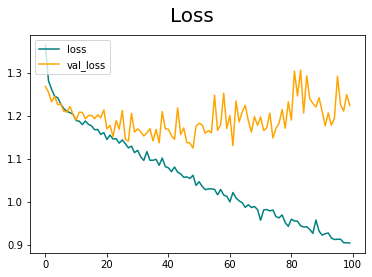

In [87]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

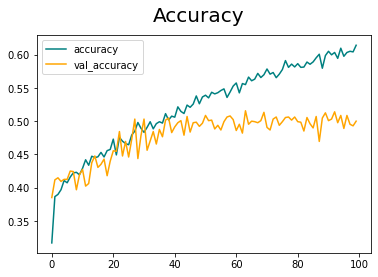

In [88]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [5]:
path_to_dir = 'Users\laptophut\Desktop\AML_2022_F_Labs\2404_AI_and_ML_Lab\Project\Model_2'
tf.saved_model.save(model, path_to_dir)

INFO:tensorflow:Assets written to: Users\laptophut\Desktop\AML_2022_F_Labs 4_AI_and_ML_Lab\Project\Model_2\assets


INFO:tensorflow:Assets written to: Users\laptophut\Desktop\AML_2022_F_Labs 4_AI_and_ML_Lab\Project\Model_2\assets
